In [15]:
import os 
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = '/Users/ppangppang/Documents/dev/dacon/car_crash/data/'

### train data 분포
- 라벨 비율

In [24]:
trn_df = pd.read_csv(path + 'train.csv')

/Users/ppangppang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


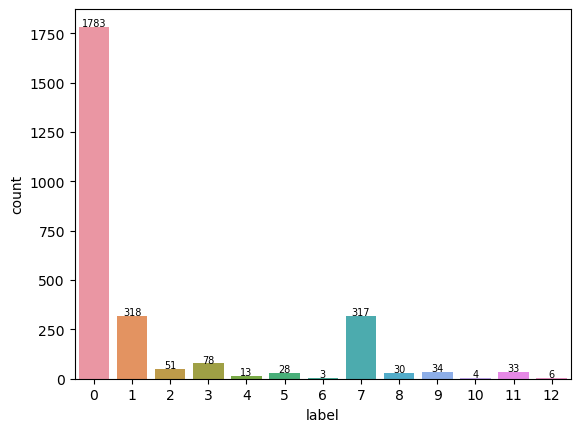

In [26]:
ax = sns.countplot(trn_df['label'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 7)
plt.show()

### 영상 분석
- 영상 크기 / 길이
- 프레임 크기 / 길이

In [19]:
import cv2

In [30]:
vids = os.listdir(path + 'train/')

In [33]:
def get_vids_info(path, vid):
    cap = cv2.VideoCapture(path + vid) # 동영상 캡쳐 객체 생성

    #불러온 비디오 파일의 정보 출력
    vid_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # 영상길이
    vid_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 영상 w
    vid_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))# 영상 h
    fps = cap.get(cv2.CAP_PROP_FPS)   # 영상 fps

    return vid_len, vid_w, vid_h, fps

In [34]:
vid_len, vid_w, vid_h, fps, frame_cnt = [],[],[],[],[]

for v in vids:
    vid_len_v, vid_w_v, vid_h_v, fps_v = get_vids_info(path+'train/', v)
    vid_len.append(vid_len_v)
    vid_w.append(vid_w_v)
    vid_h.append(vid_h_v)
    fps.append(fps_v)

In [43]:
trn_df['frames'] = vid_len
trn_df['width'] = vid_w_v
trn_df['height'] = vid_h_v
trn_df['fps'] = fps_v

In [44]:
trn_df

,sample_id,video_path,label,frames,width,height,fps
0,TRAIN_0000,./train/TRAIN_0000.mp4,7,50,1280,720,10.0
1,TRAIN_0001,./train/TRAIN_0001.mp4,7,50,1280,720,10.0
2,TRAIN_0002,./train/TRAIN_0002.mp4,0,50,1280,720,10.0
3,TRAIN_0003,./train/TRAIN_0003.mp4,0,50,1280,720,10.0
4,TRAIN_0004,./train/TRAIN_0004.mp4,1,50,1280,720,10.0
...,...,...,...,...,...,...,...
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3,50,1280,720,10.0
2694,TRAIN_2694,./train/TRAIN_2694.mp4,5,50,1280,720,10.0
2695,TRAIN_2695,./train/TRAIN_2695.mp4,0,50,1280,720,10.0
2696,TRAIN_2696,./train/TRAIN_2696.mp4,0,50,1280,720,10.0


/Users/ppangppang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ppangppang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ppangppang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

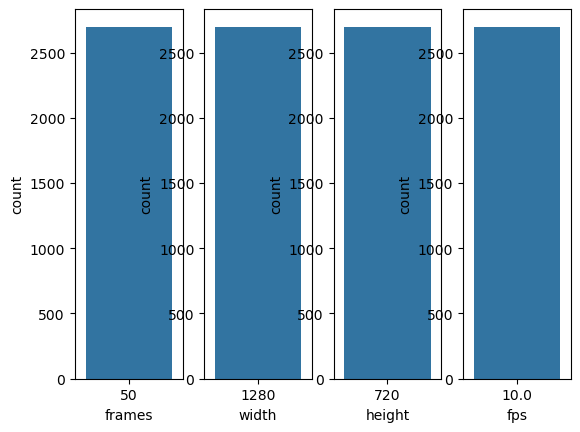

In [52]:
fig, ax = plt.subplots(ncols=4)
sns.countplot(trn_df['frames'], ax=ax[0])
sns.countplot(trn_df['width'], ax=ax[1])
sns.countplot(trn_df['height'], ax=ax[2])
sns.countplot(trn_df['fps'], ax=ax[3])
plt.show()

- 영상 10프레임, 크기, 영상길이 동일